Looking at the different distributions of features between various classes is the first step in building any sort of classifier. However, even *univariate* analysis can lead to some cluttered visualizations fore more than a couple of different classes.

### Example

We'll load up our old, reliable Iris Dataset

In [1]:
%pylab inline

import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Populating the interactive namespace from numpy and matplotlib


Map the `0, 1, 2` into actual flower names.

In [2]:
mapping = {num: flower
           for num, flower
           in enumerate(data['target_names'])}

flowers = pd.Series(data['target'], name='flower').map(mapping)

Then build out an iterator we can use to cycle through DataFrames by flower class

In [3]:
gb = df.groupby(flowers)

So for a feature like `petal width`, the separation is pretty straight-forward. I'd ship this.

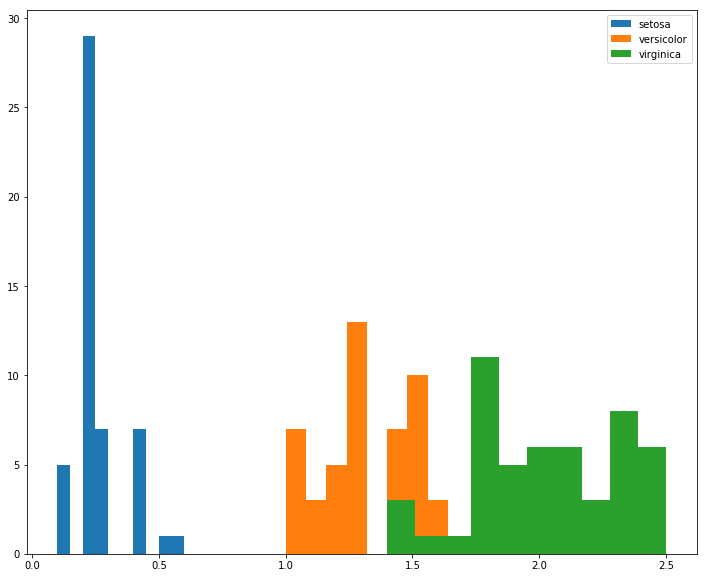

In [4]:
fig, ax = plt.subplots(figsize=(12, 10))

for idx, group in gb:
    ax.hist(group['petal width (cm)'], label=idx)
    
ax.legend();

However, if we instead look at `sepal length`, there's more overlap between class distributions, and due to rendering order, it's not obvious what's happening to `versicolor` in the `[6.0, 7.0]` range.

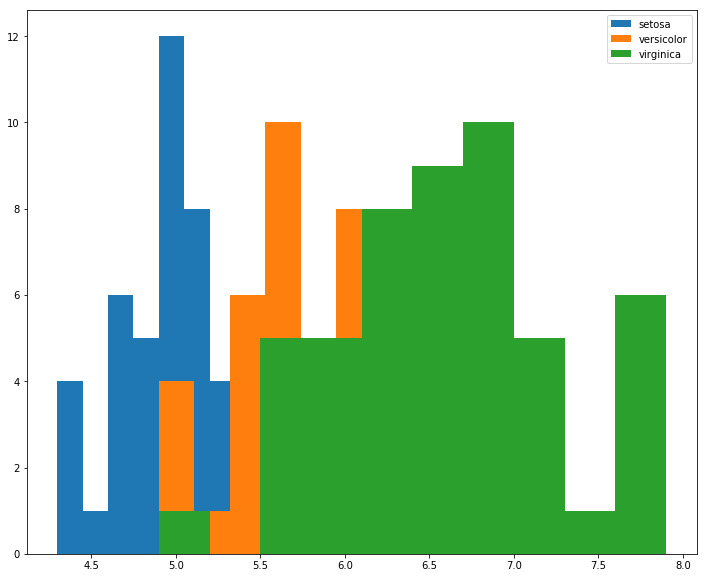

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))

for idx, group in gb:
    ax.hist(group['sepal length (cm)'], label=idx)

ax.legend();

For this, we might consider using the `histtype='step'` argument to un-shade the area beneath the bars

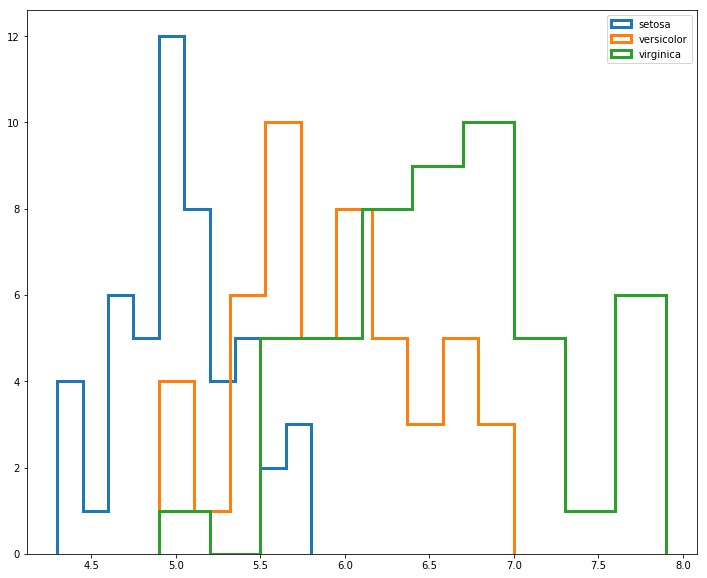

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))

for idx, group in gb:
    ax.hist(group['sepal length (cm)'], histtype='step', linewidth=3, label=idx)

ax.legend();

But this still looks a bit crowded.

Worth pointing out, however, that this technique can be extremely valueable when looking at two different classes of similar distributions, such as the one outlined in [hundredblocks' book on ML Applications](https://github.com/hundredblocks/ml-powered-applications/blob/master/notebooks/dataset_exploration.ipynb).

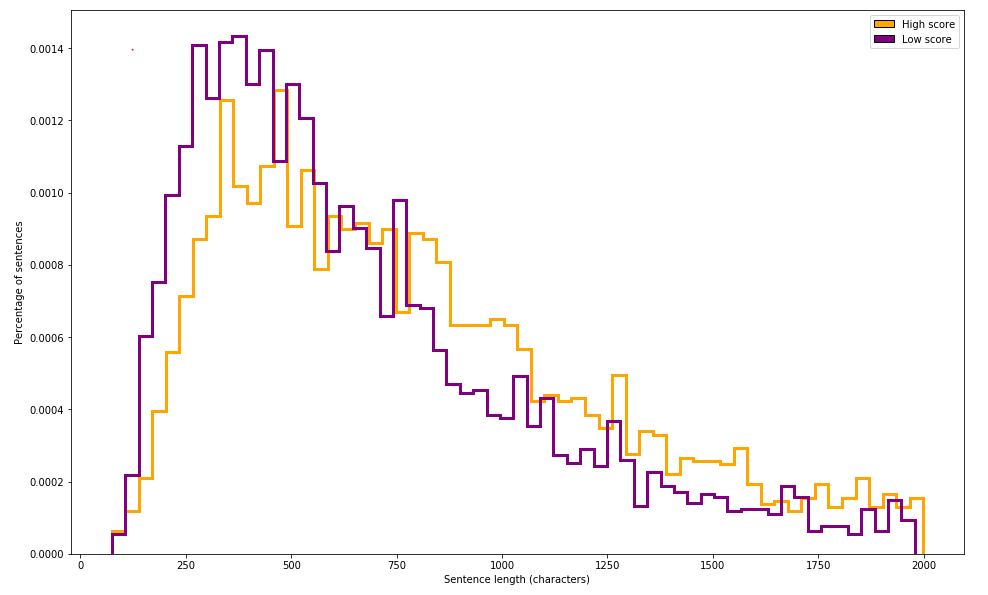

In [7]:
from IPython.display import Image
Image('images/dual_hist.PNG')

For this, I'd probably just ratched down the value of `alpha` argument. But it's easy to see how the introduction of another class or two would really make this a mess.

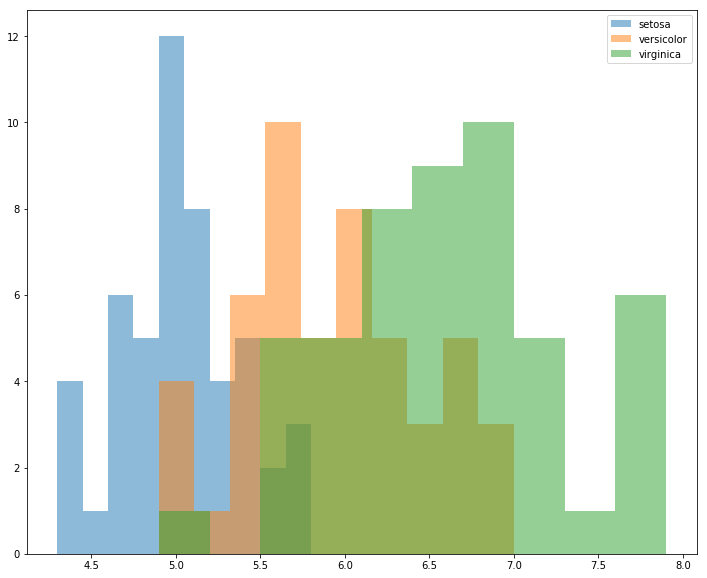

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))

for idx, group in gb:
    ax.hist(group['sepal length (cm)'], alpha=.5, label=idx)
    
ax.legend();

In the case that I have more than 3 or so classes, I think I'd opt to put each class on its own histogram, **taking great care to remember to utilize the `sharex=True` argument so I can meaningfully compare their distributions**

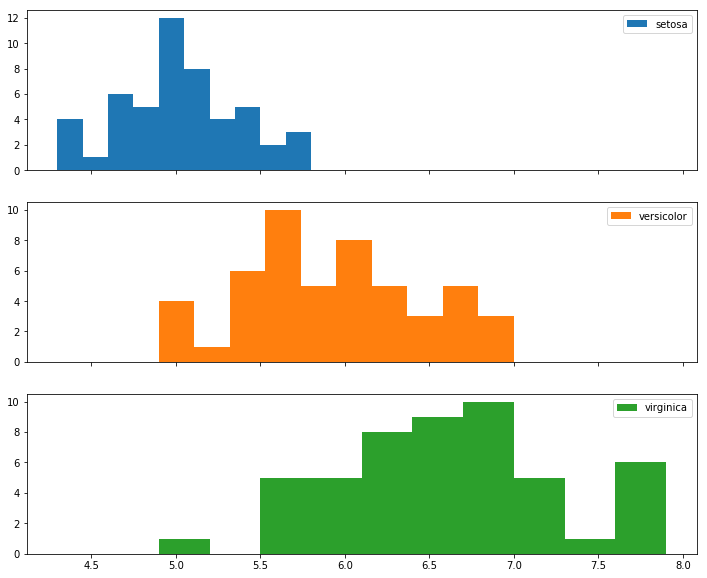

In [9]:
# to keep the same color scheme
colors = mpl.cm.get_cmap('tab10').colors
N_CLASSES = 3

fig, axes = plt.subplots(N_CLASSES, 1, figsize=(12, 10), sharex=True)

for ax, (idx, group), color in zip(axes, gb, colors):
    ax.hist(group['sepal length (cm)'], label=idx, color=color)
    ax.legend();